<a href="https://colab.research.google.com/github/Eduardoqro/Kata-Data-Visualization/blob/main/Modulo_6_Datos_num%C3%A9ricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizando relaciones estadísticas

Importamos las librerías necesarias, el estilo y los datos 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")


In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
tips2=pd.DataFrame(zip(tips["total_bill"],tips["tip"]))
tips2.describe()

,0,1
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


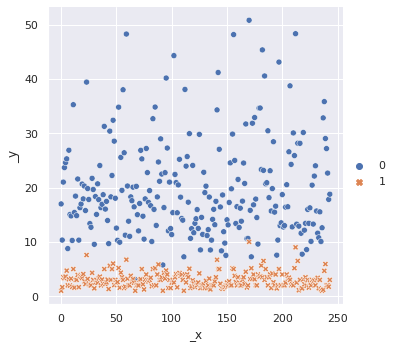

In [ ]:
sns.relplot(data=tips2)

## Scatter Plot

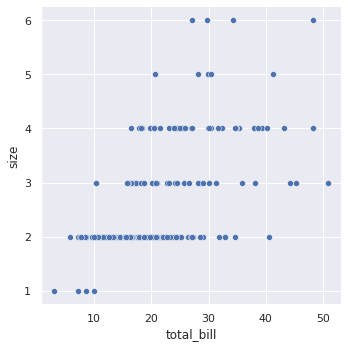

In [ ]:
sns.relplot(data=tips, x="total_bill", y="size")

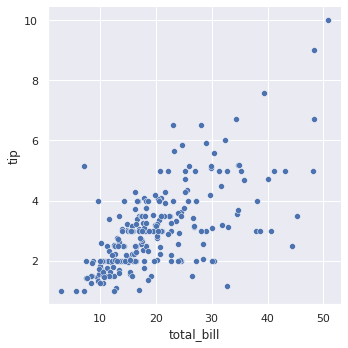

In [ ]:
#The scatterplot() is the default kind in relplot() (it can also be forced by setting kind="scatter"):
sns.relplot(x="total_bill", y="tip", data=tips);

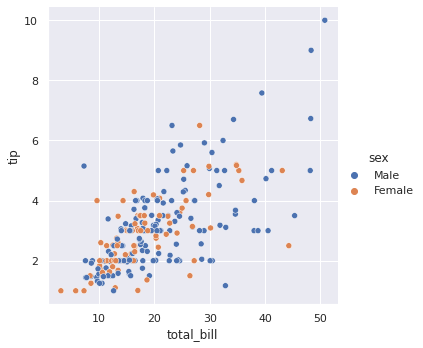

In [ ]:
#Desagregaciones
#Se puede agregar una tercera dimensión de los datos mediante la clasificación de una categoría
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips);

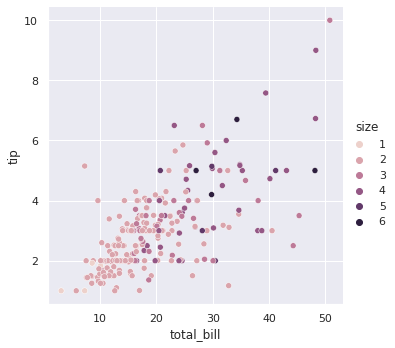

In [ ]:
#asi agregamos ahora una tercera variable pero en este caso numérica
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

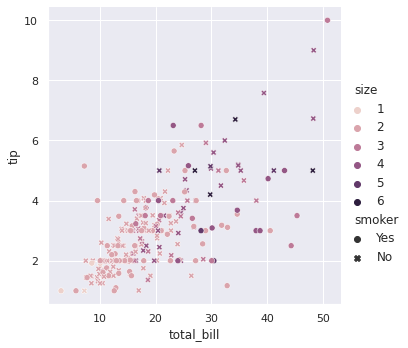

In [ ]:
#sns.relplot(x="total_bill", y="tip", hue="size", data=tips);
sns.relplot(x="total_bill", y="tip", hue="size", style="smoker", data=tips);

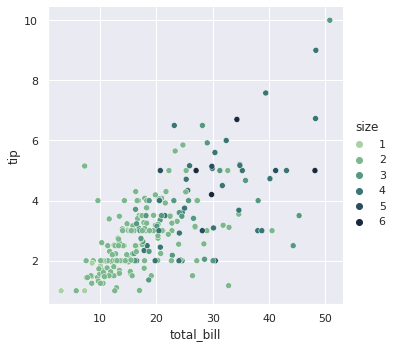

In [ ]:
#podemos ajustar la paleta
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips);

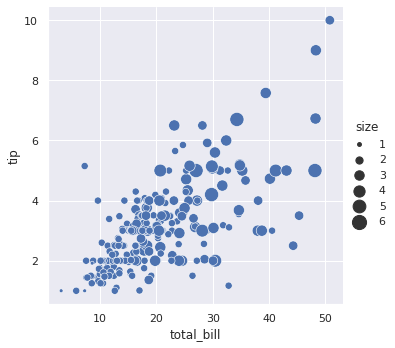

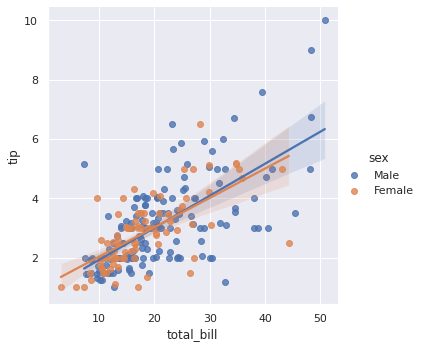

In [ ]:
#o mejor aún, por tamaño 
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);
sns.lmplot(x="total_bill", y="tip", hue="sex", data=tips);

# Visualización Múltiple

In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


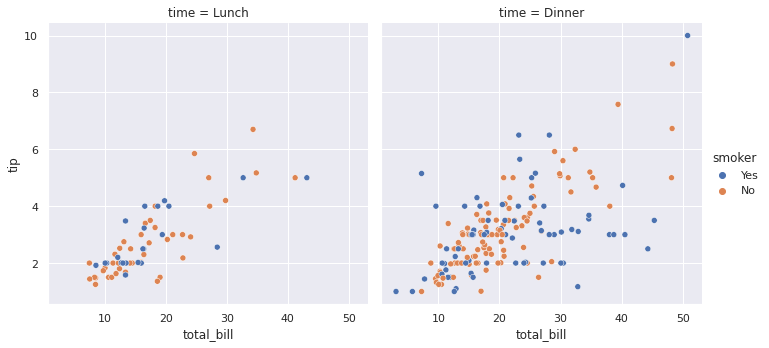

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

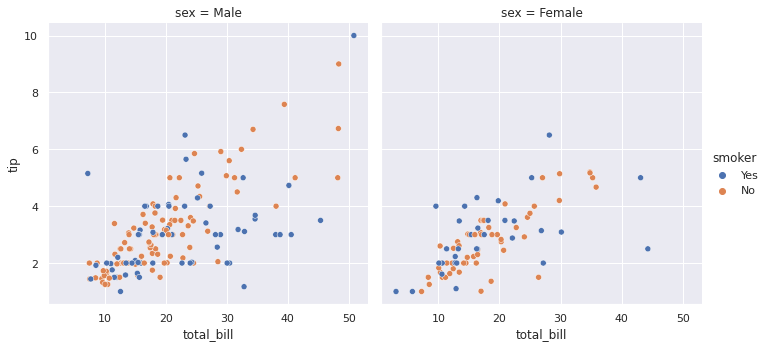

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="sex", data=tips)

### Challenge

Ahora, danos tus mejores insights de la base iris (seguro ya la has trabajado antes) con scatter plots

In [ ]:
# Challenge!!! 👇🏼

import pandas as pd
from sklearn.datasets import load_iris
iris_df = load_iris()


iris_df = pd.DataFrame(iris_df.data, columns = iris_df.feature_names)

## Line Plots

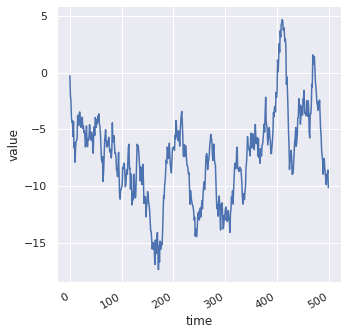

In [ ]:
#se generan datos aleatorios 

df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

In [ ]:
df

,time,value
0,0,-0.257814
1,1,-1.935227
2,2,-2.437520
3,3,-3.991799
4,4,-4.371886
...,...,...
495,495,-9.887193
496,496,-8.974514
497,497,-8.952745
498,498,-8.596986


Una función muy util en Seaborn es la acumulación y los intervalos de confianza, en este caso la base de datos tiene muchas observaciones en el mismo valor de la eje X, por lo que la linea principal grafica la media y el intervalo de confianza a 95%. De esta manera nos ahorra un paso la pura visualización

In [ ]:
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [ ]:
fmri[fmri['timepoint'] == 2]

,subject,timepoint,event,region,signal
151,s6,2,stim,parietal,-0.030781
201,s7,2,stim,parietal,-0.034874
202,s4,2,stim,parietal,-0.028109
226,s13,2,stim,parietal,-0.062916
227,s12,2,stim,parietal,0.077277
228,s11,2,stim,parietal,-0.059089
229,s10,2,stim,parietal,0.011751
230,s9,2,stim,parietal,0.040620
231,s8,2,stim,parietal,-0.049964
232,s5,2,stim,parietal,-0.017499


In [ ]:
fmri.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


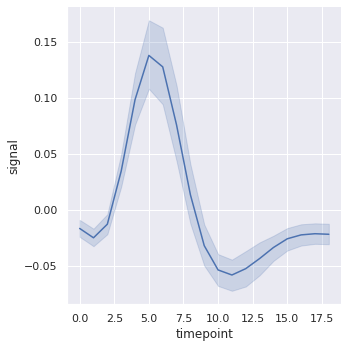

In [ ]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

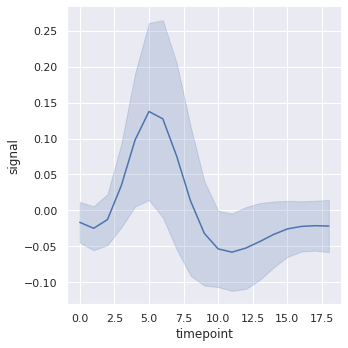

In [ ]:
#podemos graficar en lugar del intervalo de confianza, la desviación estándar
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

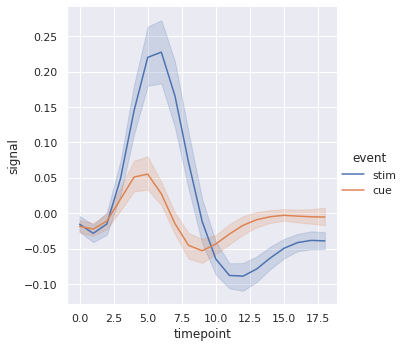

In [ ]:
#podemos graficar la misma linea con su intervalo pero ahora con una tercera dimensión en este caso categórica
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

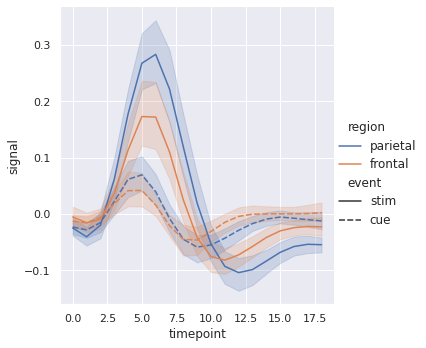

In [ ]:
#hacemos este split con otra variable mas 
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

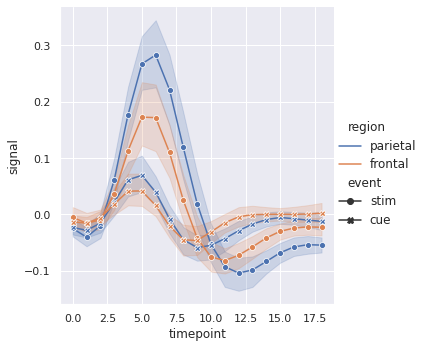

In [ ]:
#Otra modificación visual 
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

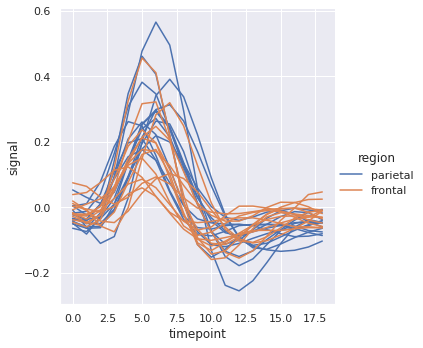

In [ ]:
#o puedes observar cada una de las observaciones para entender mejor tu muestra 
sns.relplot(x="timepoint", y="signal", hue="region", units="subject", estimator=None, kind="line", data=fmri.query("event == 'stim'"));

In [ ]:
#sns.relplot(x="timepoint", y ="signal", hue="event", style="event", col="subject", data="fmri", col_wrap=5, height=3, aspect=.75, linewidth=2.5, kind="line")

Graficando con fechas 

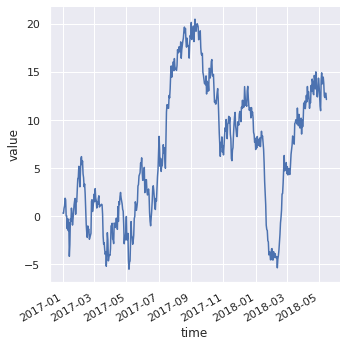

In [ ]:
#generamos una base específica aleatoria
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))

g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

### Challenge #2 👇🏼

Ahora, danos tus mejores insights de [Una base importada de Yahoo Finance](https://pypi.org/project/yfinance/)


In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

msft = yf.Ticker("AAPL")

# get stock info
print(msft.info)

# get historical market data
hist = msft.history(period="1y",interval="1d")
hist

#Visualizing distributions of data

## Histogramas

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.head()
penguins.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [ ]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


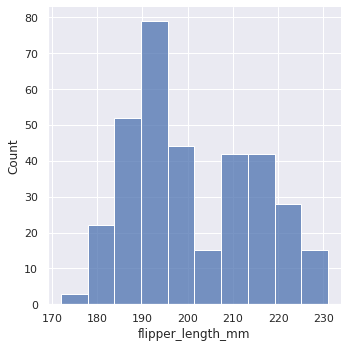

In [ ]:
sns.displot(penguins, x="flipper_length_mm")

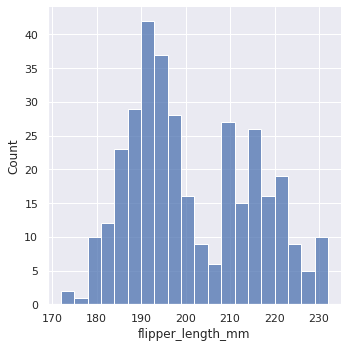

In [ ]:
#Seleccionamos el tamaño del bin (ancho de nuestras barras)
sns.displot(penguins, x="flipper_length_mm", binwidth=3)

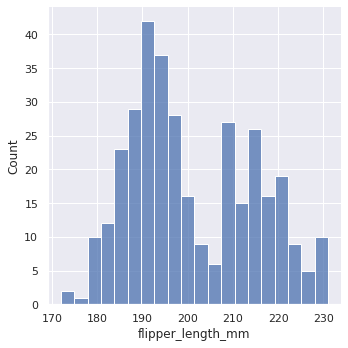

In [ ]:
#O el número de bins que deseamos 
sns.displot(penguins, x="flipper_length_mm", bins=20)

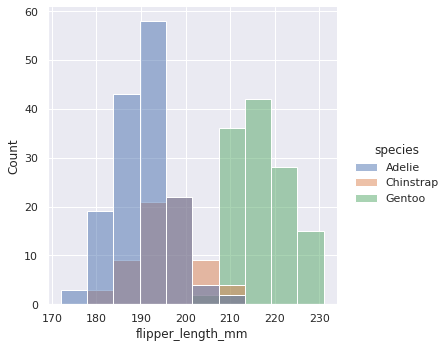

In [ ]:
#Si encontramos algo interesante y conocemos la base podemos separarlo por alguna variable categórica
sns.displot(penguins, x="flipper_length_mm", hue="species")

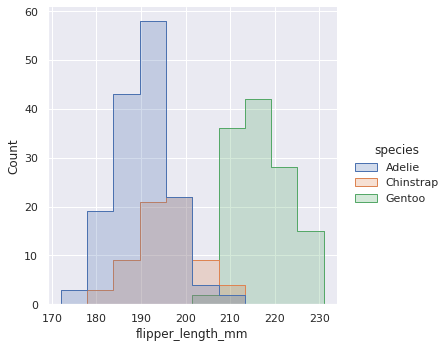

In [ ]:
#Ajustamos a un step plot para mejro visualización 
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

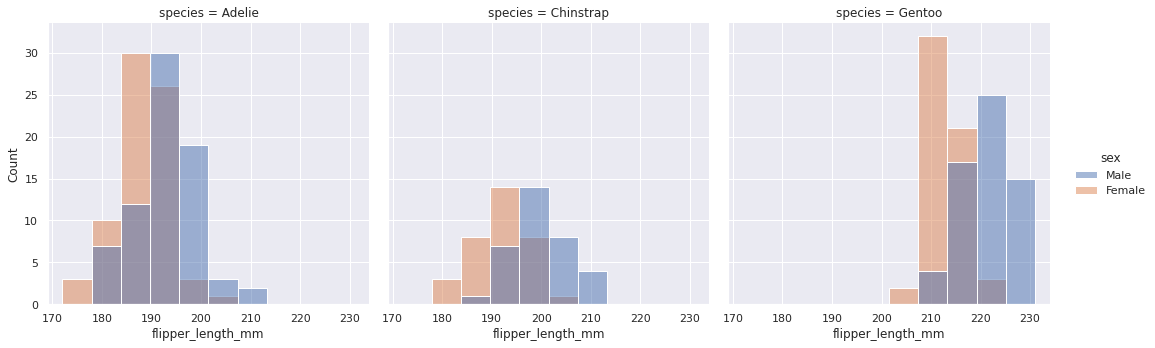

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="sex",col="species")

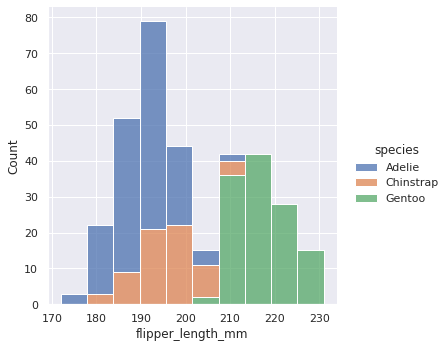

In [ ]:
#"Stackear" las variables igual es una opción, no es siempre la mejor
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

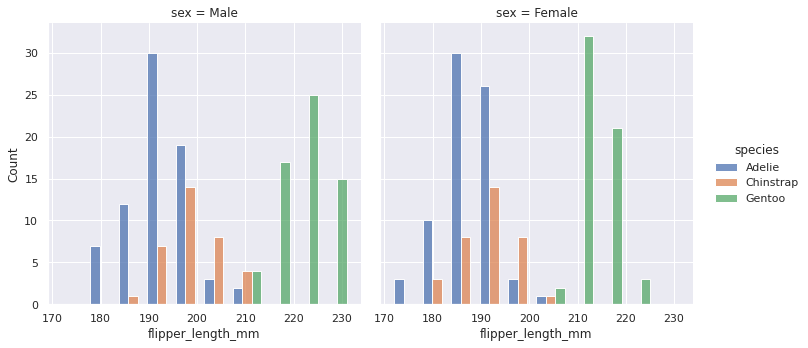

In [ ]:
#para evitar separa la base y hacer dos visualizaciones, esta es una opción
#sns.displot(penguins, x="flipper_length_mm", hue= "species", col="sex", multiple="stakc")
sns.displot(penguins, x="flipper_length_mm", hue= "species", col="sex", multiple="dodge")


## Estimación de función de densidad por Kernel

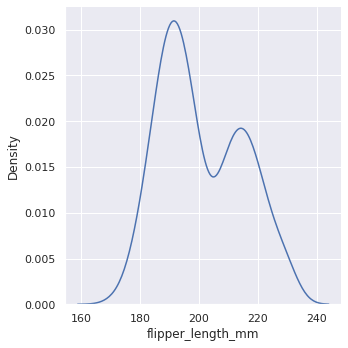

In [ ]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

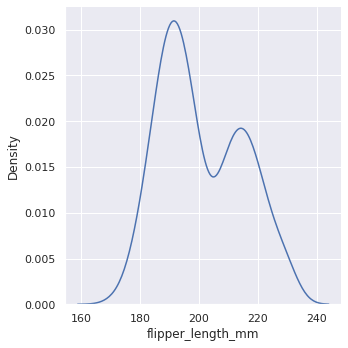

In [ ]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

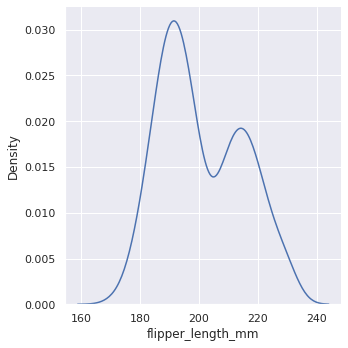

In [ ]:
#Modificamos el ajuste de suavización
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=1)

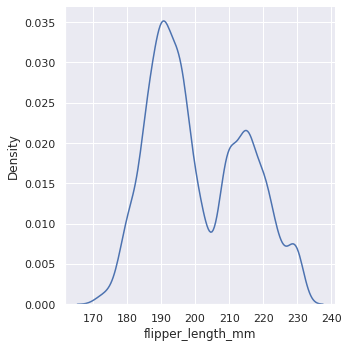

In [ ]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=0.5)

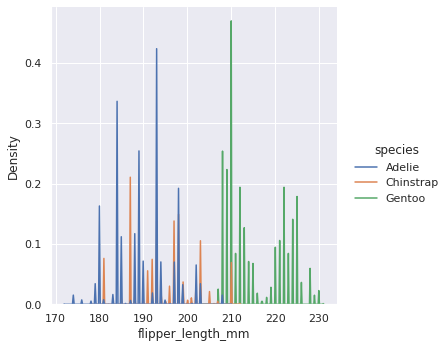

In [ ]:
#lo mismo pero revisando otras variables
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", bw_adjust=.01)

### Challenge #3 👇🏼

Ahora danos tus insights de las distribuciones de diferentes variables sobre la base Iris

Ahora, construye los rendimientos diarios sobre las acciones y cuéntanos tus insigths de su distribución

Analizar la distribución de la variable per_tips de la base tips

# Visualizing bivariate distributions

Como visualizar 3 variables en un plano 2D

Para esta tarea utilizaremos **displot** que no es más que una abreviatura para **dis**tribution on **plot**.

Acá te dejo un [excelente video](https://www.youtube.com/watch?v=4DA_dgc521o) explicando más a fondo las ventajas de displot.

In [ ]:
penguins

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
#sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", cbar=True) #col="species"

In [ ]:
sns.displot(penguins, x="bill_length_mm", hue="species")

In [ ]:
sns.displot(penguins, x="bill_depth_mm", hue="species")

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)

# Mixed Visualization

In [ ]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

In [ ]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

In [ ]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

In [ ]:
sns.pairplot(penguins)

Challenge
Grafica los pairplots de la base penguins según alguna categoría que describa mejor la base

# Gráficas 3D

Plotly!!!!

In [ ]:
import plotly.express as px
df = px.data.iris()

fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
                    color='petal_length', symbol='species')
fig.show()

## Elevación del monte St. Bruno
https://en.wikipedia.org/wiki/Mont_Saint-Bruno

In [ ]:
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [ ]:
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
                  # {l: 65, r: 50, b:65, t:90}
)

fig.show()

## Math Plots!!!

Torus

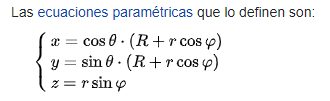

In [ ]:
import plotly.figure_factory as ff

import numpy as np
from scipy.spatial import Delaunay

u = np.linspace(0, 2*np.pi, 20)
v = np.linspace(0, 2*np.pi, 20)
u,v = np.meshgrid(u,v)
u = u.flatten()
v = v.flatten()

x = (3 + (np.cos(v)))*np.cos(u)
y = (3 + (np.cos(v)))*np.sin(u)
z = np.sin(v)

points2D = np.vstack([u,v]).T
tri = Delaunay(points2D)
simplices = tri.simplices

fig = ff.create_trisurf(x=x, y=y, z=z,
                         simplices=simplices,
                         title="Torus", aspectratio=dict(x=1, y=1, z=0.3))
fig.show()

Mobius Band

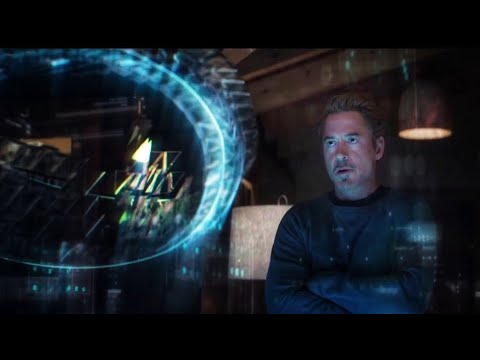

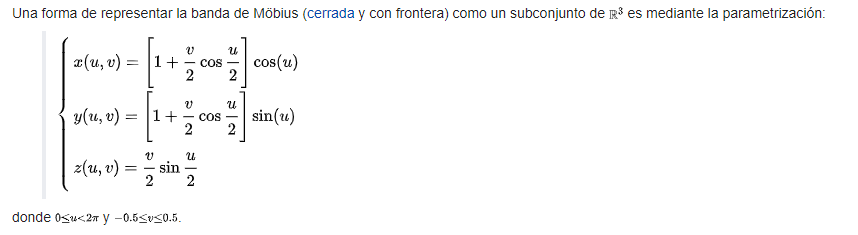

In [ ]:
import plotly.figure_factory as ff

import numpy as np
from scipy.spatial import Delaunay

u = np.linspace(0, 2*np.pi, 24)
v = np.linspace(-1, 1, 8)
u,v = np.meshgrid(u,v)
u = u.flatten()
v = v.flatten()

tp = 1 + 0.5*v*np.cos(u/2.)
x = tp*np.cos(u)
y = tp*np.sin(u)
z = 0.5*v*np.sin(u/2.)

points2D = np.vstack([u,v]).T
tri = Delaunay(points2D)
simplices = tri.simplices

fig = ff.create_trisurf(x=x, y=y, z=z,
                         colormap="Portland",
                         simplices=simplices,
                         title="Mobius Band")
fig.show()